Objective

Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

We will be following the below steps to solve this problem:

Importing the libraries

Using some pre-defined utility functions

Loading the data

Cleaning the data

Dividing the dataset into training and test dataset using train_test_split in the ratio 85:15

Training several models and analyzing their performance to select a model

Use dimensionality reduction to improve the ‘training’,
‘fine-tuning’ and ‘prediction’ time.

Fine-tuning the model by finding the best hyper-parameters and features

Evaluating selected model using test dataset



In [2]:
import numpy as np    
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from zipfile import ZipFile
from zipfile import *
import zipfile

In [3]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [4]:
filePath_train_set = 'train-images-idx3-ubyte.gz'
filePath_train_label = 'train-labels-idx1-ubyte.gz'

filePath_test_set = 't10k-images-idx3-ubyte.gz'
filePath_test_label = 't10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,offset=8)
        
trainLabel
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


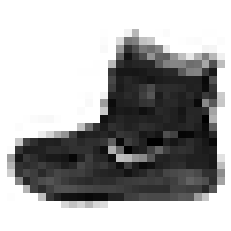

In [5]:
showImage(X_train[0])

In [6]:
y_train[0]

9

In [7]:
np.random.seed(42)

In [8]:
shuffle_index = np.random.permutation(60000)

In [9]:
X_train, y_train = X_train[shuffle_index ], y_train[shuffle_index ]

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10,random_state=42)

In [16]:
log_clf.fit(X_train_scaled, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

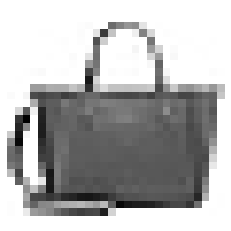

In [18]:
y_train[0] 

y_train_predict[0]

showImage(X_train[0])

In [19]:
y_train_predict = log_clf.predict(X_train_scaled)

In [20]:
from sklearn.metrics import *

In [21]:
log_accuracy = accuracy_score(y_train, y_train_predict)

log_precision = precision_score(y_train, y_train_predict, average='weighted')

log_recall = recall_score(y_train, y_train_predict, average='weighted')

log_f1_score = f1_score(y_train, y_train_predict, average='weighted')

In [22]:
print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.8775333333333334
Logistic Precision:  0.876648632278309
Logistic Recall:  0.8775333333333334
Logistic F1 Score:  0.8769281105807729


End to End ML Project - Fashion MNIST - Training the Model - RandomForestClassifier
I will train the RandomForestClassifier. We will be doing the following as part of this exercise:

We will be first training the RandomForestClassifier on the training dataset
Using the trained model, make the prediction on a sample instance and compare the prediction with the actual value.
Using the trained model, make the prediction on the whole training dataset
Calculate - accuracy, precision, recall and F1 Score for RandomForestClassifier.

In [23]:
from sklearn.ensemble import RandomForestClassifier

Create an instance of RandomForestClassifier by passing parameters - n_estimators=20, max_depth=10, random_state=42, and store this created instance in a variable called 'rnd_clf'.

In [24]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

In [25]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

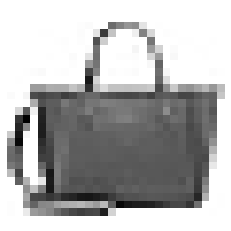

In [27]:
y_train[0] 

y_train_predict[0]

showImage(X_train[0])

In [28]:
y_train_predict = rnd_clf.predict(X_train)

In [29]:
rnd_accuracy = accuracy_score(y_train, y_train_predict )

rnd_precision = precision_score(y_train, y_train_predict , average='weighted')

rnd_recall = recall_score(y_train, y_train_predict , average='weighted')

rnd_f1_score = f1_score(y_train, y_train_predict , average='weighted')

In [30]:
print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_recall)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  0.8766666666666667
Random Forest Precision:  0.8784075869648036
Random Forest Recall:  0.8766666666666667
Random Forest F1 Score:  0.875054729413325


Now, let us use cross validation to find the proper score of each model, also to ensure that the model is not overfitting or underfitting. Based on this cross-validation, we will select the model for fine-tuning its hyperparameters.

NOTE:

If the cross validation score values for a performance measure (say accuracy) are not varying significantly for various folds (k-folds), then we can say that the model is not overfitting.
If the cross validation score values for a performance measure (say accuracy) are not very low for various folds (k-folds), then we can say that the model is not underfitting.
We will perform k-fold cross-validation. We will randomly split the training set into 3 distinct subsets called folds (cv=3). Since cross validation is a computing intensive and time consuming process, we are limiting 'cv' (no. of folds) to 3 instead of normally 10 folds. Then will train and evaluate each model 3 times by picking a different fold for evaluation every time and training on the other 2 folds The result will be an array containing the 3 evaluation scores for each of the measures - accuracy, precision, recall, F1 score. We will use cross_val_score() function to calculate accuracy

But accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets. (A dataset is said to be skewed when some classes are much more frequent than others. )

Even if the current training dataset may not be skewed, the future test dataset (live) on which the model runs can be skewed, hence, considering we may get skewed dataset in future, let us calculate Precision, Recall and F1 score also for the models. And will use cross_val_predict() function to create confusion matrix to calculate Precision, Recall and F1 score.

In [31]:
from sklearn.model_selection import *

In [32]:
from sklearn.metrics import *

In [33]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [34]:
log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)


i am calling cross_val_score() function by passing following parameters to it - the model (log_clf), the scaled training dataset (X_train_scaled), y_train, cv=3 and scoring="accuracy" - and save the returned value in a variable called log_cv_scores.

calling  display_scores() function, by passing to it the log_cv_scores variable, to calculate and display(print) the 'accuracy' score, the mean of the 'accuracy' score and the 'standard deviation' of the 'accuracy' score.

In [35]:
log_cv_scores = cross_val_score(log_clf,X_train_scaled, y_train, cv=3,scoring="accuracy") 
display_scores(log_cv_scores)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
log_cv_accuracy = log_cv_scores.mean()

calllingcross_val_predict() function by passing following parameters to it - the model (log_clf), the scaled training dataset (X_train_scaled), y_train, cv=3 - and save the returned value in a variable called y_train_pred.

In [37]:
y_train_pred = cross_val_predict(log_clf,X_train_scaled, y_train, cv=3)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [38]:
confusion_matrix(y_train, y_train_pred)
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Logistic CV Accuracy: ", log_cv_accuracy)
print("Logistic CV Precision: ", log_cv_precision)
print("Logistic CV Recall: ", log_cv_recall)
print("Logistic CV F1 Score: ", log_cv_f1_score)

Logistic CV Accuracy:  0.8470833333333333
Logistic CV Precision:  0.8458694883855286
Logistic CV Recall:  0.8470833333333333
Logistic CV F1 Score:  0.846272242627941


In [39]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(rnd_cv_scores)
rnd_cv_accuracy = rnd_cv_scores.mean()

y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Random Forest CV Accuracy: ", rnd_cv_accuracy)
print("Random Forest CV Precision: ", rnd_cv_precision)
print("Random Forest CV Recall: ", rnd_cv_recall)
print("Random Forest CV F1 Score: ", rnd_cv_f1_score)

Scores: [0.85155 0.84745 0.84585]
Mean: 0.8482833333333334
Standard deviation: 0.002400462918318523
Random Forest CV Accuracy:  0.8482833333333334
Random Forest CV Precision:  0.8482875291253137
Random Forest CV Recall:  0.8482833333333333
Random Forest CV F1 Score:  0.8452574403288833


I am performing using 'Grid Search' technique.

Grid search takes a lot of time on large datasets. Hence, let us apply 'Dimensionality Reduction' to the training dataset to reduce the number of features in the dataset, so that the time taken for grid search and prediction is reduced. Also, we will calculate the scores based on the reduced features.

I will also check, if dimensionality reduction leads to any significant loss of information from the images in our training dataset. If we get a significant loss of information with dimensionality reduction, we will not use dimensionality reduction for our training dataset (and hence the problem).

we don't need to convert a 3-dimensional dataset to 2-dimensional plane, etc. Hence, we won't be using Manifold technique for dimensionality reduction here.

I will be using Projection technique (PCA) for dimensionality reduction for our problem.

I will use Scikit Learn's PCA class which uses SVD (Singular Value Decomposition) internally and also the projection.

We can experiment with various values of n_components (variance ratio).

For the current problem, with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784), and there was significant loss of information (quality) in the 'recovered' (decompressed) images. Hence, we have selected n_components=0.99, which gives 459 features (out of original 784) and there is no significant loss of information (quality) in the 'recovered' images.

The comparison of the 'original' dataset images and the 'compressed' dataset images (got after decompression) shows that there is not much information loss due to dimensionality reduction by using 0.99 variance ratio. Hence, we will go ahead with performing the Grid Search using this 'reduced' training dataset (X_train_reduced).

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_



459

In [41]:
np.sum(pca.explained_variance_ratio_)
X_train_recovered = pca.inverse_transform(X_train_reduced)
X_train_recovered

array([[-2.48797312e-03, -5.96433541e-02, -2.64799041e-01, ...,
        -8.85292778e+00, -5.96963810e+00, -5.76101386e-01],
       [ 9.99125871e-04, -1.86446123e-04, -1.21567901e-01, ...,
        -1.24093207e+00,  2.89035382e-01, -1.32498404e-01],
       [ 5.31265814e-04,  1.67056622e-02, -4.65824827e-02, ...,
         6.49491636e-01, -1.57628832e+00, -1.04129515e-01],
       ...,
       [-1.90326662e-03, -4.66239606e-02, -6.20875999e-02, ...,
         1.41432368e+01,  2.05818455e+00, -1.70722955e-02],
       [ 1.81846681e-02,  3.33669956e-03, -4.46765031e-02, ...,
        -8.01706549e+00, -6.53114073e+00, -4.74048233e-01],
       [ 2.23472905e-03,  2.77105651e-02,  8.74972427e-02, ...,
        -1.07657545e-01,  2.59009050e-01,  1.50691494e-01]])

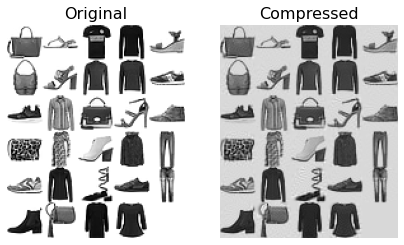

In [42]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()


Let us now perform the Grid Search using the dimensionally reduced training dataset X_train_reduced.

Since our best model is Voting Classifier which is made up of two models Logistic Regression and Random Forrest. To do the grid search, we will have to supply the various values of parameters for both of the underlying models.

Since the grid search is a very intensive process, we are going to only try a handful of permutations because it would take a huge time otherwise.

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV

In [44]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)


In [45]:
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [46]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15],
    }]

In [47]:
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring="neg_mean_squared_error")

In [48]:
grid_search.fit(X_train_reduced, y_train)
grid_search.best_params_
grid_search.best_estimator_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                       